In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [2]:
#to load lasio file
las = lasio.read("15-9-19_SR_COMP.LAS")

In [3]:
# investigating content 
for i in las.well:
    print(f"{i.descr}({i.mnemonic}):{i.value}")

Top Depth(STRT):102.1568
Bottom Depth(STOP):4636.514
Depth Increment(STEP):0.1524
Null Value(NULL):-999.25
Field Name(FLD):Q15
NAME(WELL):15/9-19
WELLBORE(WBN):15/9-19 SR
COUNTRY(NATI):NOR
COUNTRY(CTRY):NOR
OPERATOR(COMP):STATOIL
PERM DATUM(PDAT):MSL
RIG NAME(COUN):NORTH SEA
STATE(STAT):NORWAY
PB WELL ID(PBWE):15/9-19
PB WELLBORE ID(APIN):15/9-19 SR
PB WELL NAME SET(PBWS):ALL


In [4]:
las.well.WELL.value

'15/9-19'

In [5]:
for i in las.curves:
    print(i.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [6]:
#enumerate function keeping count and curves that are represent in file
for i,j in enumerate(las.curves):
    print(f"Curve:{j.mnemonic}, units:{j.unit},Description:{j.descr}")

Curve:DEPT, units:M,Description:1  DEPTH
Curve:AC, units:US/F,Description:2  Sonic Transit Time (Slowness)
Curve:CALI, units:IN,Description:3  Caliper
Curve:DEN, units:G/CC,Description:4  Bulk Density
Curve:GR, units:GAPI,Description:5  Gamma Ray
Curve:NEU, units:%,Description:6  Neutron Porosity
Curve:RDEP, units:OHMM,Description:7  Deep Resistivity
Curve:RMED, units:OHMM,Description:8  Medium Resistivity


In [7]:
#creating pandas dataframe
well = las.df()

In [8]:
well.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


In [9]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29754 entries, 102.1568 to 4636.514
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      7007 non-null   float64
 1   CALI    7007 non-null   float64
 2   DEN     7084 non-null   float64
 3   GR      28117 non-null  float64
 4   NEU     7096 non-null   float64
 5   RDEP    12223 non-null  float64
 6   RMED    12223 non-null  float64
dtypes: float64(7)
memory usage: 1.8 MB


In [10]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,7007.000000,7007.000000,7084.000000,28117.000000,7096.000000,12223.000000,12223.000000
mean,79.498714,9.611068,2.449055,71.986798,20.117166,2.438382,2.386781
std,18.390705,1.019751,0.165122,32.922780,14.729530,6.631202,5.735731
min,1.025100,6.000000,1.943000,2.766100,2.178300,0.250300,0.179000
25%,66.154350,9.142900,2.319975,50.255200,10.631350,0.988000,0.847850
50%,74.661900,9.589400,2.505600,74.998500,15.718550,1.536100,1.490800
75%,93.304550,9.904800,2.585125,92.343800,25.067375,2.434050,2.415400
max,181.813900,20.330400,3.001300,304.333700,146.347400,198.537100,168.604400


In [11]:
well_nan = well.notnull()*1
well_nan

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,0,0,0,1,0,0,0
102.3092,0,0,0,1,0,0,0
102.4616,0,0,0,1,0,0,0
102.6140,0,0,0,1,0,0,0
102.7664,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
4635.9044,0,0,0,0,0,1,1
4636.0568,0,0,0,0,0,1,1
4636.2092,0,0,0,0,0,1,1


### Visualising Data

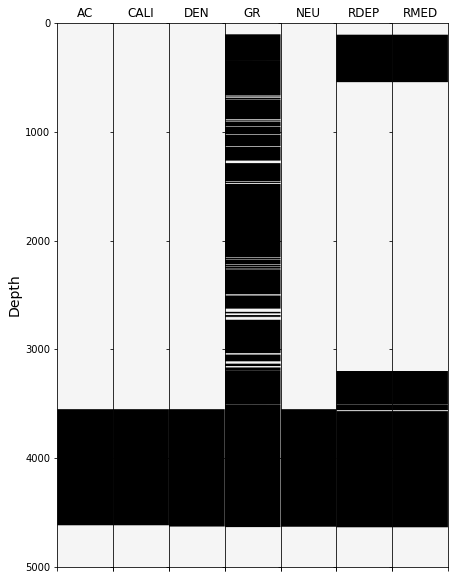

In [21]:
fig = plt.subplots(figsize=(7,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,7), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,7), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,7), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,7), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,7), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,7), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,7), (0,6), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(5000, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='black')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()